In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize']=8,4
sns.set_style("darkgrid")

In [2]:
train=pd.read_csv("F:/DATA SCIENCE/train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [4]:
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [5]:
train.duplicated().sum()

0

In [6]:
train.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [7]:
train.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [8]:
train.columns=train.columns.str.lower()
train.columns=train.columns.str.replace(" ","_")

In [9]:
train.columns

Index(['id', 'loan_amount', 'funded_amount', 'funded_amount_investor', 'term',
       'batch_enrolled', 'interest_rate', 'grade', 'sub_grade',
       'employment_duration', 'home_ownership', 'verification_status',
       'payment_plan', 'loan_title', 'debit_to_income',
       'delinquency_-_two_years', 'inquires_-_six_months', 'open_account',
       'public_record', 'revolving_balance', 'revolving_utilities',
       'total_accounts', 'initial_list_status', 'total_received_interest',
       'total_received_late_fee', 'recoveries', 'collection_recovery_fee',
       'collection_12_months_medical', 'application_type', 'last_week_pay',
       'accounts_delinquent', 'total_collection_amount',
       'total_current_balance', 'total_revolving_credit_limit', 'loan_status'],
      dtype='object')

<Axes: ylabel='Frequency'>

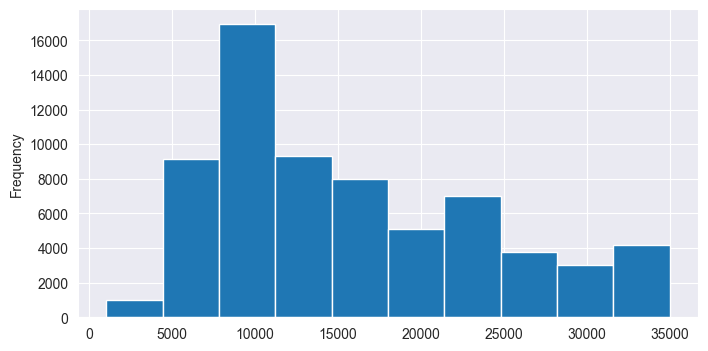

In [10]:
train['funded_amount'].plot(kind='hist')

<Axes: ylabel='Frequency'>

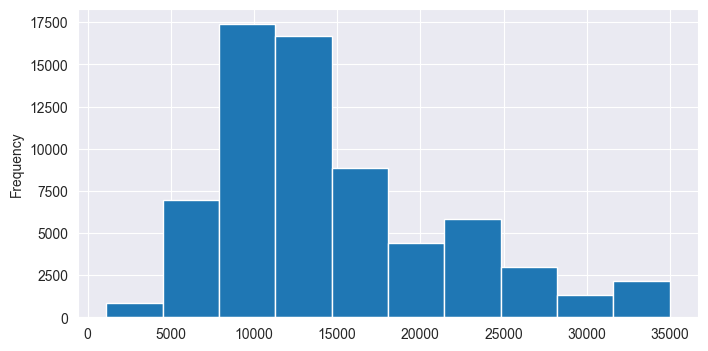

In [11]:
train['funded_amount_investor'].plot(kind='hist')

In [12]:
train['term'].unique()

array([59, 36, 58], dtype=int64)

In [13]:
train['term']=train['term'].astype("str")

<Axes: xlabel='term', ylabel='count'>

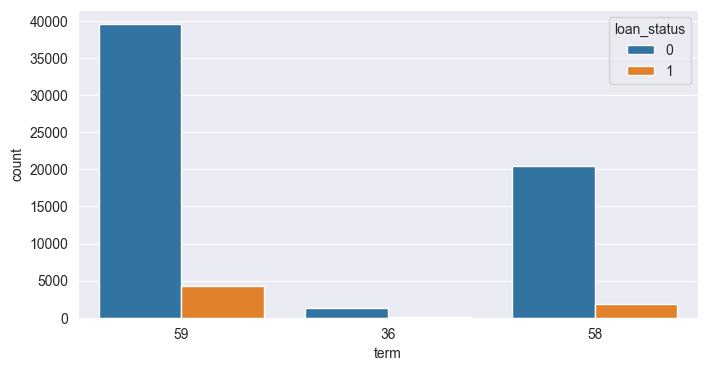

In [14]:
sns.countplot(data=train,x='term',hue='loan_status')

In [15]:
train['batch_enrolled'].nunique()

41

Text(0.5, 1.0, 'Count plot:Batch Enrolled')

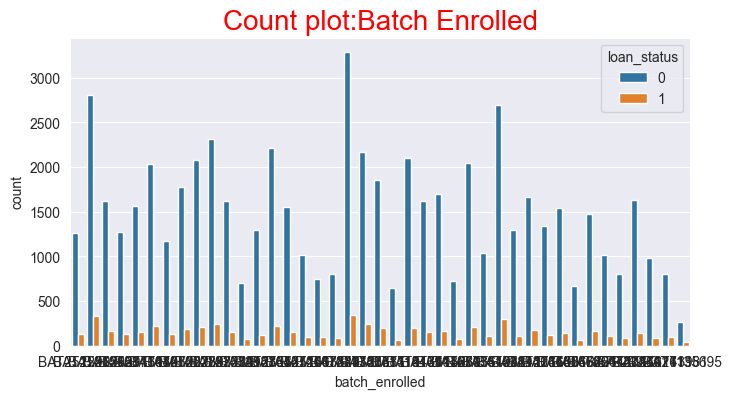

In [16]:
sns.countplot(data=train,x='batch_enrolled',hue='loan_status')
plt.title("Count plot:Batch Enrolled",fontsize=20,color='red')

<Axes: xlabel='interest_rate', ylabel='Count'>

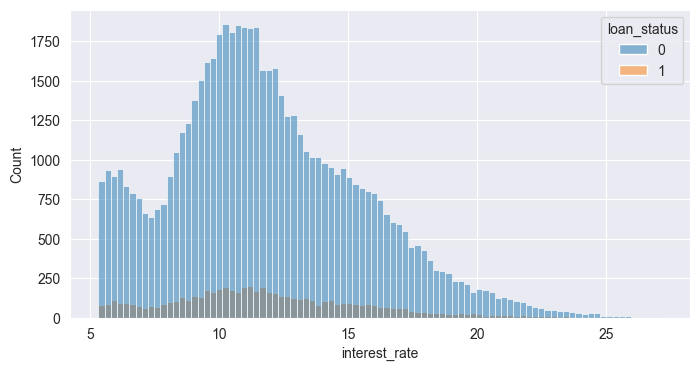

In [33]:
sns.histplot(data=train,x='interest_rate',hue='loan_status')

In [18]:
cat_col=list(train.select_dtypes(include='object').columns)
temp=pd.DataFrame(columns=['Feature','cardinality'])
for i  in range(len(cat_col)):
    temp.loc[i,'Feature']=cat_col[i]
    temp.loc[i,'cardinality']=train[cat_col[i]].nunique()
temp.sort_values(by='cardinality',ascending=False).style.background_gradient(cmap='jet')
    

,Feature,cardinality
7,loan_title,109
1,batch_enrolled,41
3,sub_grade,35
2,grade,7
0,term,3
4,employment_duration,3
5,verification_status,3
8,initial_list_status,2
9,application_type,2
6,payment_plan,1


In [19]:
train.drop(['loan_title','batch_enrolled','sub_grade','payment_plan','id'],axis=1,inplace=True)

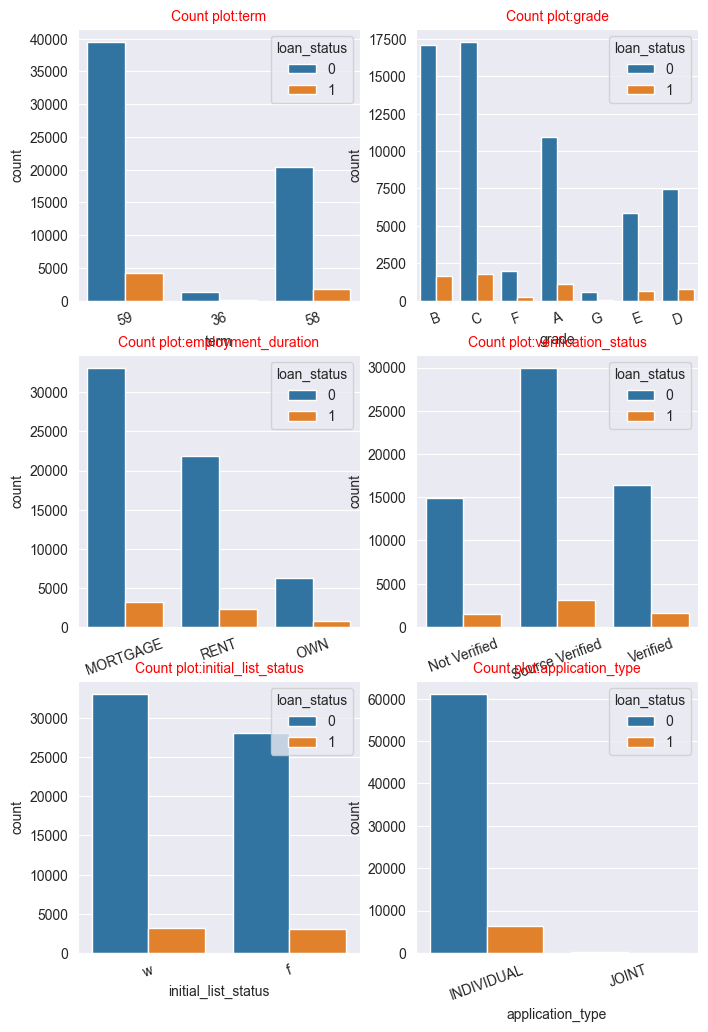

In [20]:
cat_col=list(train.select_dtypes(include='object').columns)
plt.figure(figsize=(8,12))
for i  in range(len(cat_col)):
    plt.subplot(3,2,(i+1))
    sns.countplot(data=train,x=cat_col[i],hue='loan_status')
    plt.xticks(rotation=20)
    plt.xlabel("{}".format(cat_col[i]))
    plt.title("Count plot:{}".format(cat_col[i]),fontsize=10,color='red')

,loan_amount,funded_amount,funded_amount_investor,term,interest_rate,grade,employment_duration,home_ownership,verification_status,debit_to_income,...,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
0,10000,32236,12329.36286,59,11.135007,B,MORTGAGE,176346.62670,Not Verified,16.284758,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,C,RENT,39833.92100,Source Verified,15.412409,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,F,MORTGAGE,91506.69105,Source Verified,28.137619,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,C,MORTGAGE,108286.57590,Source Verified,18.043730,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,C,MORTGAGE,44234.82545,Source Verified,17.209886,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,9.408858,C,MORTGAGE,83961.15003,Verified,28.105127,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,8323,11046,15637.46301,59,9.972104,C,RENT,65491.12817,Source Verified,17.694279,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,15897,32921,12329.45775,59,19.650943,A,MORTGAGE,34813.96985,Verified,10.295774,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,16567,4975,21353.68465,59,13.169095,D,OWN,96938.83564,Not Verified,7.614624,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [22]:
train.select_dtypes(include='object').columns


Index(['term', 'grade', 'employment_duration', 'verification_status',
       'initial_list_status', 'application_type'],
      dtype='object')

In [23]:
train=pd.get_dummies(train,columns=['term', 'grade', 'employment_duration', 'verification_status',
       'initial_list_status', 'application_type'],drop_first=True)

In [24]:
y=train['loan_status']
X=train.drop('loan_status',axis=1)

In [25]:
from sklearn.model_selection import  train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score

In [26]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
smote.fit(X,y)
X,y=smote.fit_resample(X,y)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)

0.918250122502314

In [30]:
importance=pd.DataFrame({"score":model.feature_importances_,'features':X.columns}).sort_values(by='score',ascending=False)

In [31]:
importance

,score,features
23,0.085745,term_58
24,0.072435,term_59
33,0.052310,verification_status_Source Verified
34,0.048287,verification_status_Verified
26,0.039006,grade_C
25,0.037683,grade_B
32,0.035426,employment_duration_RENT
14,0.032643,total_received_late_fee
5,0.031562,debit_to_income
18,0.031150,last_week_pay


In [34]:
recall_score(y_test,y_pred)

0.8525132993160351